In [1]:
import numpy as np
import  pandas as pd

In [2]:
laptop = pd.read_csv(r'C:\Users\gopal\Downloads\newdirectory\laptop_data.csv')

In [3]:
laptop.head()

Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [4]:
laptop.shape

(1303, 12)

In [5]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
laptop.duplicated().sum()

0

In [7]:
laptop.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
laptop.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [9]:
laptop['Ram'] = laptop['Ram'].str.replace('GB','')
laptop['Weight'] = laptop['Weight'].str.replace('kg','')

In [10]:
laptop.sample(5)

Company   TypeName  Inches             ScreenResolution  \
1289    Asus  Ultrabook    13.3  IPS Panel Full HD 1920x1080   
523       HP   Notebook    15.6                     1366x768   
1106     MSI     Gaming    17.3            Full HD 1920x1080   
235     Dell   Notebook    15.6            Full HD 1920x1080   
167     Dell     Gaming    15.6            Full HD 1920x1080   

                              Cpu Ram                Memory  \
1289     Intel Core M 6Y30 0.9GHz   8             512GB SSD   
523      Intel Core i3 6006U 2GHz   4             128GB SSD   
1106  Intel Core i7 6700HQ 2.6GHz   8  128GB SSD +  1TB HDD   
235    Intel Core i7 7500U 2.7GHz  16             256GB SSD   
167   Intel Core i7 7700HQ 2.8GHz   8  128GB SSD +  1TB HDD   

                          Gpu       OpSys Weight       Price  
1289    Intel HD Graphics 515  Windows 10    1.2  38841.1200  
523     Intel HD Graphics 520  Windows 10   1.63  36709.9200  
1106  Nvidia GeForce GTX 960M  Windows 10    2.9  80516.2032  
235        AMD Radeon R7 M445       Linux   2.36  47898.7200  
167   Nvidia GeForce GTX 1050  Windows 10   2.56  56502.9072

In [11]:
laptop.Ram = laptop.Ram.astype('int32')
laptop.Weight = laptop.Weight.astype('float32')

In [12]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


### EDA 

In [14]:
import seaborn as sns

## univariate analysis 

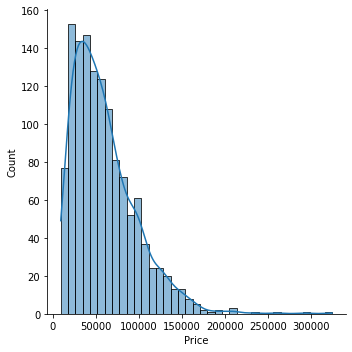

In [16]:
sns.displot(laptop['Price'],kde=True)

<AxesSubplot:>

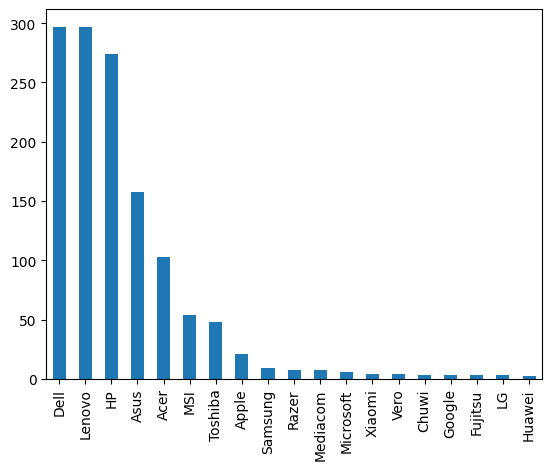

In [17]:
laptop['Company'].value_counts().plot(kind='bar')

In [18]:
import matplotlib.pyplot as plt

In [19]:
sns.barplot(x='Company',y='Price',data=laptop,ci=False)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

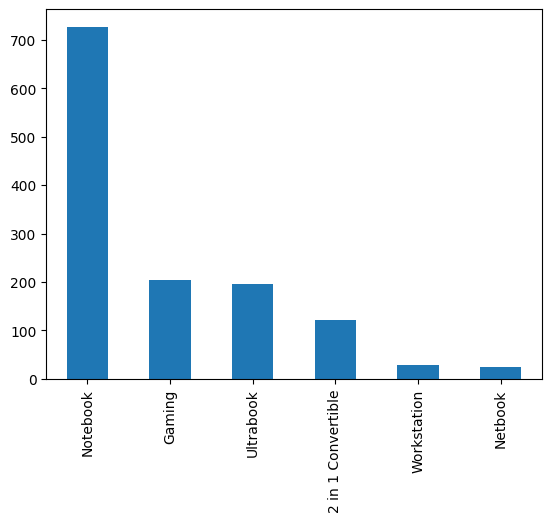

In [20]:
laptop['TypeName'].value_counts().plot(kind='bar')

In [21]:
sns.barplot(x='TypeName',y='Price',data=laptop,ci=False)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\gopal\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

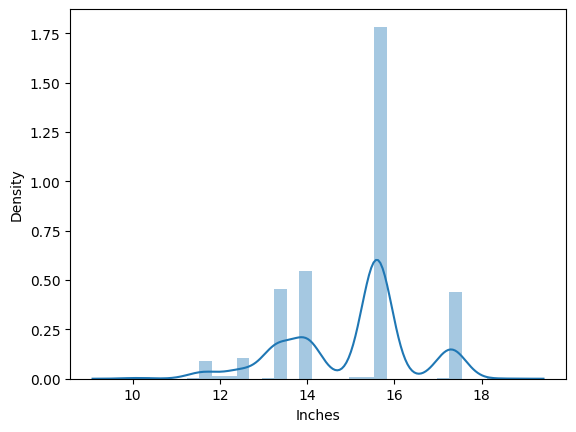

In [22]:
sns.distplot(laptop['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

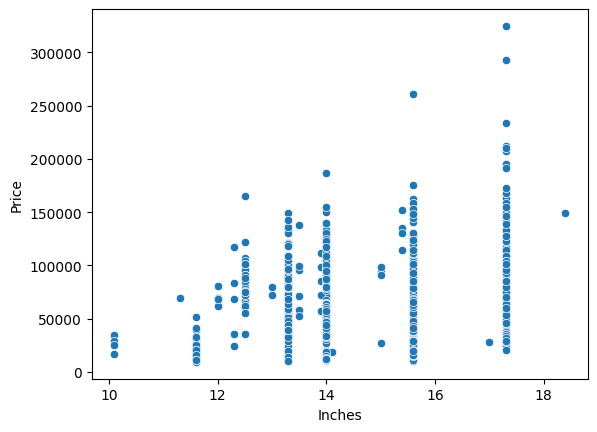

In [23]:
sns.scatterplot(x='Inches',y='Price',data=laptop)

In [24]:
laptop['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [25]:
laptop['TouchScreen']=laptop['ScreenResolution'].apply(lambda x :1 if 'Touchscreen' in x else 0)

<AxesSubplot:>

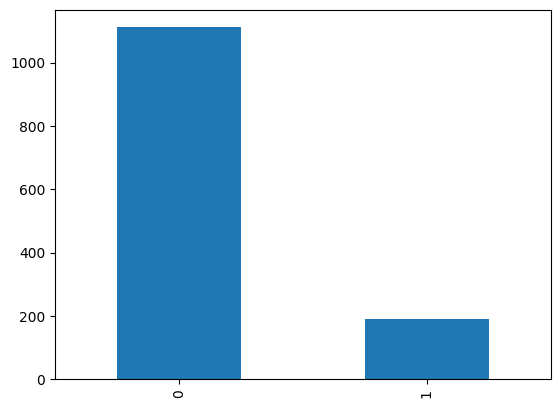

In [26]:
laptop['TouchScreen'].value_counts().plot(kind='bar')

In [27]:

sns.barplot(x='TouchScreen',y='Price',data=laptop)

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

In [28]:


laptop['ips']=laptop['ScreenResolution'].apply(lambda x :1 if 'IPS' in x else 0)

<AxesSubplot:>

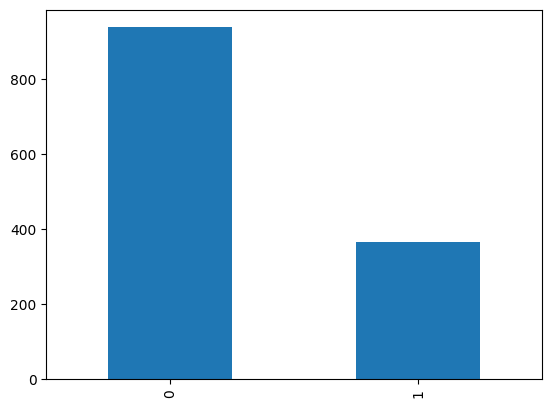

In [29]:
laptop['ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='ips', ylabel='Price'>

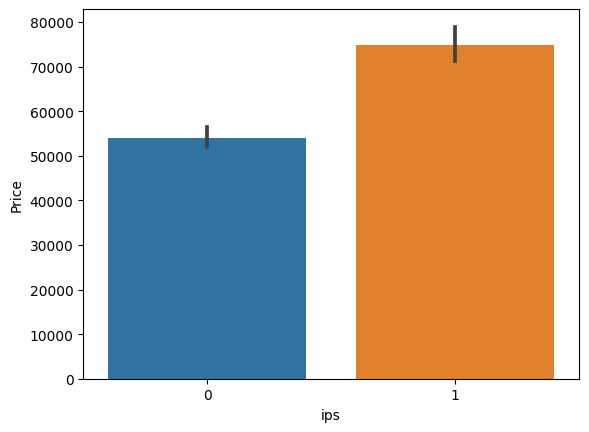

In [30]:
sns.barplot(x='ips',y='Price',data=laptop)

In [31]:
new = laptop['ScreenResolution'].str.split('x',expand=True)

In [32]:
new[0].apply(lambda x : x[-4:])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: 0, Length: 1303, dtype: object

In [33]:
laptop['y_res'] = new[1]
laptop['x_res'] = new[0].apply(lambda x : x[-4:])

In [34]:
laptop.sample(5)

Company            TypeName  Inches  \
1051      HP            Notebook    15.6   
414     Asus  2 in 1 Convertible    13.3   
120     Acer            Notebook    15.6   
459       HP            Notebook    17.3   
286   Lenovo            Notebook    15.6   

                               ScreenResolution                         Cpu  \
1051                IPS Panel Full HD 1920x1080  Intel Core i7 7500U 2.7GHz   
414   IPS Panel Full HD / Touchscreen 1920x1080  Intel Core i5 7200U 2.5GHz   
120   IPS Panel Full HD / Touchscreen 1920x1080  Intel Core i3 7100U 2.4GHz   
459                                    1600x900    Intel Core i3 6006U 2GHz   
286                 IPS Panel Full HD 1920x1080  Intel Core i7 7500U 2.7GHz   

      Ram     Memory                    Gpu       OpSys  Weight      Price  \
1051    8    1TB HDD   Nvidia GeForce 940MX  Windows 10    1.91  52161.120   
414     8  256GB SSD  Intel HD Graphics 620  Windows 10    1.27  49443.840   
120     6    1TB HDD  Intel HD Graphics 620  Windows 10    2.10  25521.120   
459     8  256GB SSD  Intel HD Graphics 520  Windows 10    2.50  34093.872   
286     8  256GB SSD  Intel HD Graphics 630  Windows 10    1.95  58448.160   

      TouchScreen  ips y_res x_res  
1051            0    1  1080  1920  
414             1    1  1080  1920  
120             1    1  1080  1920  
459             0    0   900  1600  
286             0    1  1080  1920

In [35]:
laptop['x_res'] = laptop['x_res'].astype('int32')

In [36]:
laptop['y_res'] = laptop['y_res'].astype('int32')

In [37]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  y_res             1303 non-null   int32  
 14  x_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [38]:
laptop.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
ips            0.252208
y_res          0.552809
x_res          0.556529
Name: Price, dtype: float64

In [39]:
laptop['ppi'] = (laptop['x_res']**2 + laptop['y_res']**2)**0.5/laptop['Inches'].astype('float')

In [40]:
laptop.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
ips            0.252208
y_res          0.552809
x_res          0.556529
ppi            0.473487
Name: Price, dtype: float64

In [41]:
laptop.drop(columns=['ScreenResolution','x_res','y_res','Inches'],inplace=True)

In [42]:
laptop.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  TouchScreen  ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          ppi  
0  226.983005  
1  127.677940  
2  141.211998  
3  220.534624  
4  226.983005

In [43]:
laptop['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [44]:
laptop['Cpu_Name'] = laptop['Cpu'].apply(lambda x : " ".join(x.split()[0:3]))

In [45]:
laptop.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  TouchScreen  ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          ppi       Cpu_Name  
0  226.983005  Intel Core i5  
1  127.677940  Intel Core i5  
2  141.211998  Intel Core i5  
3  220.534624  Intel Core i7  
4  226.983005  Intel Core i5

In [46]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else : 
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else : 
            return 'AMD Processor'
        

In [47]:
laptop['Cpu_Brand'] = laptop['Cpu_Name'].apply(fetch_processor)

In [48]:
sns.barplot(x='Cpu_Brand',y='Price',data=laptop)

<AxesSubplot:xlabel='Cpu_Brand', ylabel='Price'>

In [49]:
laptop.drop(columns = ['Cpu','Cpu_Name'],inplace=True)

In [50]:
laptop.head()

Company   TypeName  Ram               Memory                           Gpu  \
0   Apple  Ultrabook    8            128GB SSD  Intel Iris Plus Graphics 640   
1   Apple  Ultrabook    8  128GB Flash Storage        Intel HD Graphics 6000   
2      HP   Notebook    8            256GB SSD         Intel HD Graphics 620   
3   Apple  Ultrabook   16            512GB SSD            AMD Radeon Pro 455   
4   Apple  Ultrabook    8            256GB SSD  Intel Iris Plus Graphics 650   

   OpSys  Weight        Price  TouchScreen  ips         ppi      Cpu_Brand  
0  macOS    1.37   71378.6832            0    1  226.983005  Intel Core i5  
1  macOS    1.34   47895.5232            0    0  127.677940  Intel Core i5  
2  No OS    1.86   30636.0000            0    0  141.211998  Intel Core i5  
3  macOS    1.83  135195.3360            0    1  220.534624  Intel Core i7  
4  macOS    1.37   96095.8080            0    1  226.983005  Intel Core i5

<AxesSubplot:xlabel='Ram', ylabel='Price'>

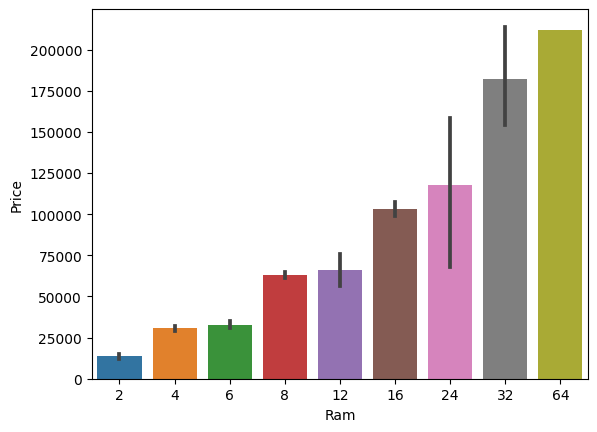

In [51]:
sns.barplot(x='Ram',y='Price',data=laptop)

In [52]:
laptop['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [53]:
laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)
laptop["Memory"] = laptop["Memory"].str.replace('GB', '')
laptop["Memory"] = laptop["Memory"].str.replace('TB', '000')
new = laptop["Memory"].str.split("+", n = 1, expand = True)

laptop["first"]= new[0]
laptop["first"]=laptop["first"].str.strip()

laptop["second"]= new[1]

laptop["Layer1HDD"] = laptop["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer1SSD"] = laptop["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer1Hybrid"] = laptop["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer1Flash_Storage"] = laptop["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop['first'] = laptop['first'].str.replace(r'\D', '')

laptop["second"].fillna("0", inplace = True)

laptop["Layer2HDD"] = laptop["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer2SSD"] = laptop["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer2Hybrid"] = laptop["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer2Flash_Storage"] = laptop["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop['second'] = laptop['second'].str.replace(r'\D', '')

laptop["first"] = laptop["first"].astype(int)
laptop["second"] = laptop["second"].astype(int)

laptop["HDD"]=(laptop["first"]*laptop["Layer1HDD"]+laptop["second"]*laptop["Layer2HDD"])
laptop["SSD"]=(laptop["first"]*laptop["Layer1SSD"]+laptop["second"]*laptop["Layer2SSD"])
laptop["Hybrid"]=(laptop["first"]*laptop["Layer1Hybrid"]+laptop["second"]*laptop["Layer2Hybrid"])
laptop["Flash_Storage"]=(laptop["first"]*laptop["Layer1Flash_Storage"]+laptop["second"]*laptop["Layer2Flash_Storage"])

laptop.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\gopal\AppData\Local\Temp\ipykernel_27164\2805713214.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop['first'] = laptop['first'].str.replace(r'\D', '')
C:\Users\gopal\AppData\Local\Temp\ipykernel_27164\2805713214.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop['second'] = laptop['second'].str.replace(r'\D', '')


In [54]:
laptop.sample(5)

Company            TypeName  Ram    Memory                     Gpu  \
839     Asus            Notebook    8   128 HDD   Intel HD Graphics 620   
95      Acer  2 in 1 Convertible    8   256 SSD  Intel UHD Graphics 620   
154       HP           Ultrabook    4   256 SSD   Intel HD Graphics 620   
904   Lenovo            Notebook    8   512 SSD   Intel HD Graphics 620   
1137    Dell            Notebook    8  1000 HDD      AMD Radeon R7 M445   

           OpSys  Weight        Price  TouchScreen  ips         ppi  \
839   Windows 10    2.30   31435.2000            0    0  141.211998   
95    Windows 10    1.50   45128.1600            1    1  165.632118   
154   Windows 10    1.48   57648.9600            0    0  157.350512   
904   Windows 10    1.95  104588.1072            0    1  141.211998   
1137  Windows 10    2.50   41771.5200            0    0  100.454670   

          Cpu_Brand   HDD  SSD  Hybrid  Flash_Storage  
839   Intel Core i5   128    0       0              0  
95    Intel Core i5     0  256       0              0  
154   Intel Core i5     0  256       0              0  
904   Intel Core i5     0  512       0              0  
1137  Intel Core i5  1000    0       0              0

In [55]:
laptop.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [56]:
laptop.drop(columns=['Memory'],inplace=True)

In [57]:
laptop.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)

In [58]:
laptop.head()

Company   TypeName  Ram                           Gpu  OpSys  Weight  \
0   Apple  Ultrabook    8  Intel Iris Plus Graphics 640  macOS    1.37   
1   Apple  Ultrabook    8        Intel HD Graphics 6000  macOS    1.34   
2      HP   Notebook    8         Intel HD Graphics 620  No OS    1.86   
3   Apple  Ultrabook   16            AMD Radeon Pro 455  macOS    1.83   
4   Apple  Ultrabook    8  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  TouchScreen  ips         ppi      Cpu_Brand  HDD  SSD  
0   71378.6832            0    1  226.983005  Intel Core i5    0  128  
1   47895.5232            0    0  127.677940  Intel Core i5    0    0  
2   30636.0000            0    0  141.211998  Intel Core i5    0  256  
3  135195.3360            0    1  220.534624  Intel Core i7    0  512  
4   96095.8080            0    1  226.983005  Intel Core i5    0  256

In [59]:
laptop['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [60]:
laptop['Gpu_Brand'] = laptop['Gpu'].apply(lambda x : x.split()[0])

In [61]:
laptop['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

In [62]:
laptop = laptop[laptop['Gpu_Brand'] != 'ARM']

<AxesSubplot:xlabel='Gpu_Brand', ylabel='Price'>

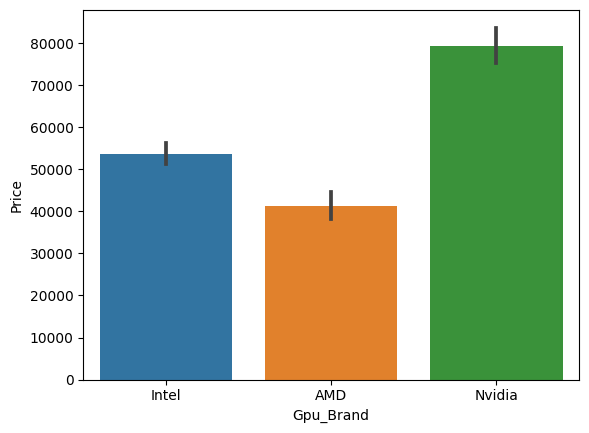

In [63]:
sns.barplot(x='Gpu_Brand',y='Price',data=laptop)

In [64]:
laptop.drop(columns=['Gpu'],inplace=True)

In [65]:
laptop.head()

Company   TypeName  Ram  OpSys  Weight        Price  TouchScreen  ips  \
0   Apple  Ultrabook    8  macOS    1.37   71378.6832            0    1   
1   Apple  Ultrabook    8  macOS    1.34   47895.5232            0    0   
2      HP   Notebook    8  No OS    1.86   30636.0000            0    0   
3   Apple  Ultrabook   16  macOS    1.83  135195.3360            0    1   
4   Apple  Ultrabook    8  macOS    1.37   96095.8080            0    1   

          ppi      Cpu_Brand  HDD  SSD Gpu_Brand  
0  226.983005  Intel Core i5    0  128     Intel  
1  127.677940  Intel Core i5    0    0     Intel  
2  141.211998  Intel Core i5    0  256     Intel  
3  220.534624  Intel Core i7    0  512       AMD  
4  226.983005  Intel Core i5    0  256     Intel

In [66]:
laptop['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [67]:
sns.barplot(x='OpSys',y='Price',data=laptop)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [69]:
laptop['os'] = laptop['OpSys'].apply(cat_os)

In [70]:
laptop.drop(columns=['OpSys'],inplace=True)

In [71]:
sns.barplot(x='os',y='Price',data=laptop)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\gopal\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

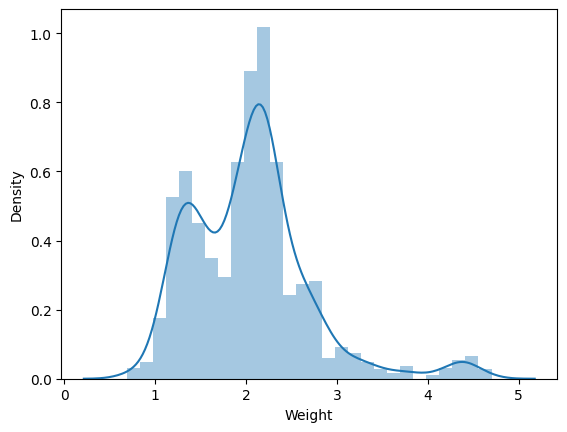

In [72]:
sns.distplot(laptop['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

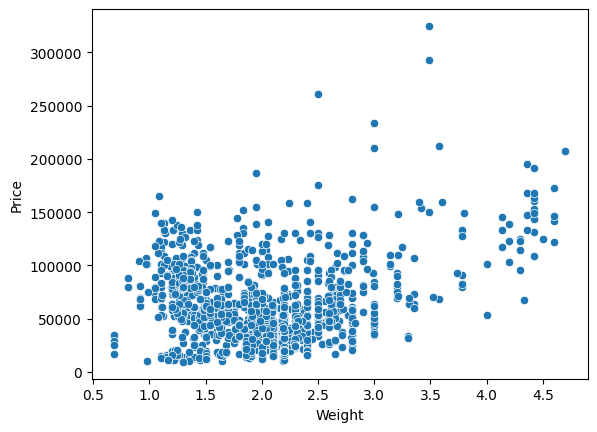

In [73]:
sns.scatterplot(x='Weight',y='Price',data=laptop)

<AxesSubplot:>

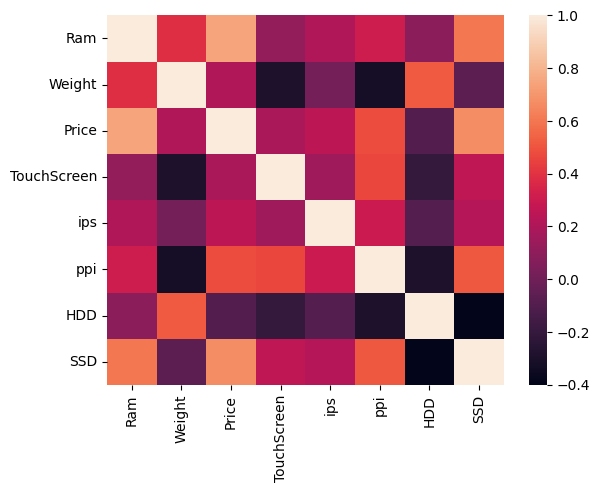

In [74]:
sns.heatmap(laptop.corr())

C:\Users\gopal\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

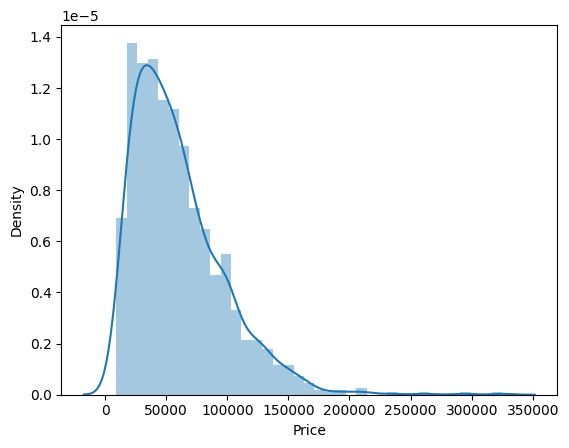

In [75]:
sns.distplot(laptop['Price'])

C:\Users\gopal\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

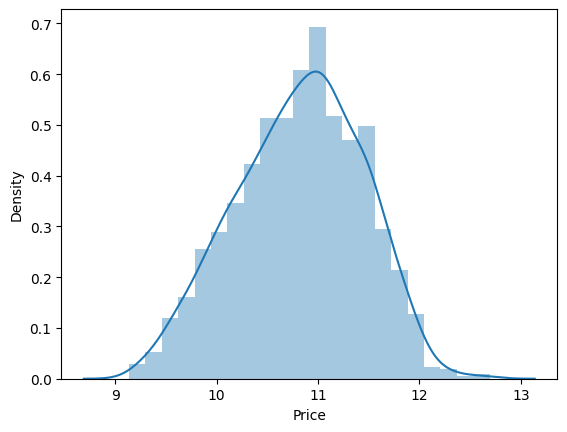

In [76]:
sns.distplot(np.log(laptop['Price']))

In [77]:
x = laptop.drop(columns='Price')
y = np.log(laptop['Price'])

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=5)

In [79]:
x_train

Company            TypeName  Ram  Weight  TouchScreen  ips         ppi  \
1265  Lenovo            Notebook    8    2.60            0    1  141.211998   
312      MSI              Gaming   16    2.80            0    1  141.211998   
842       HP            Notebook    8    2.63            0    0  106.113062   
1240  Lenovo            Notebook    6    2.20            0    0  141.211998   
1120    Vero            Notebook    4    1.35            0    0  165.632118   
...      ...                 ...  ...     ...          ...  ...         ...   
73       MSI              Gaming    8    2.70            0    0  127.335675   
1142      HP  2 in 1 Convertible    8    1.48            1    0  165.632118   
998     Asus              Gaming   16    2.50            0    0  141.211998   
206     Dell            Notebook    6    2.30            1    0  100.454670   
867   Lenovo  2 in 1 Convertible    8    1.37            1    1  165.632118   

                  Cpu_Brand   HDD  SSD Gpu_Brand       os  
1265          Intel Core i7  1000    0    Nvidia  Windows  
312           Intel Core i7  1000  256    Nvidia  Windows  
842           Intel Core i5  1000    0    Nvidia  Windows  
1240          AMD Processor     0  256       AMD  Windows  
1120  Other Intel Processor     0    0     Intel  Windows  
...                     ...   ...  ...       ...      ...  
73            Intel Core i5  1000  128    Nvidia  Windows  
1142          Intel Core i5     0  256     Intel  Windows  
998           Intel Core i7  1000  256    Nvidia  Windows  
206           Intel Core i3  1000    0     Intel  Windows  
867           Intel Core i7     0  256     Intel  Windows  

[1106 rows x 12 columns]

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score ,mean_absolute_error

In [81]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [82]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8184152092529721
MAE 0.21582365123804884


In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8160346443846881
MAE 0.2172028694343374


In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8195718807377903
MAE 0.21663824503784548


In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.705171591381159
MAE 0.23088754362686711


In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8628176001103665
MAE 0.17960993467342615


In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8085922423184032
MAE 0.20906297525467274


In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9091015821929146
MAE 0.14979721966724885


In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9085690550131911
MAE 0.15016518818654515


In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8262990674298325
MAE 0.22189368789618422


In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9032344353664588
MAE 0.1614874661377082


In [92]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9058901317248145
MAE 0.1567323002052781


In [93]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9130557222909107
MAE 0.14675458513395556


In [94]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8933965504435555
MAE 0.169335362096582


### Exporting Model


In [96]:
import pickle

In [99]:
pickle.dump(laptop,open('laptop.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [97]:
laptop

Company            TypeName  Ram  Weight        Price  TouchScreen  ips  \
0      Apple           Ultrabook    8    1.37   71378.6832            0    1   
1      Apple           Ultrabook    8    1.34   47895.5232            0    0   
2         HP            Notebook    8    1.86   30636.0000            0    0   
3      Apple           Ultrabook   16    1.83  135195.3360            0    1   
4      Apple           Ultrabook    8    1.37   96095.8080            0    1   
...      ...                 ...  ...     ...          ...          ...  ...   
1298  Lenovo  2 in 1 Convertible    4    1.80   33992.6400            1    1   
1299  Lenovo  2 in 1 Convertible   16    1.30   79866.7200            1    1   
1300  Lenovo            Notebook    2    1.50   12201.1200            0    0   
1301      HP            Notebook    6    2.19   40705.9200            0    0   
1302    Asus            Notebook    4    2.20   19660.3200            0    0   

             ppi              Cpu_Brand   HDD  SSD Gpu_Brand  \
0     226.983005          Intel Core i5     0  128     Intel   
1     127.677940          Intel Core i5     0    0     Intel   
2     141.211998          Intel Core i5     0  256     Intel   
3     220.534624          Intel Core i7     0  512       AMD   
4     226.983005          Intel Core i5     0  256     Intel   
...          ...                    ...   ...  ...       ...   
1298  157.350512          Intel Core i7     0  128     Intel   
1299  276.053530          Intel Core i7     0  512     Intel   
1300  111.935204  Other Intel Processor     0    0     Intel   
1301  100.454670          Intel Core i7  1000    0       AMD   
1302  100.454670  Other Intel Processor   500    0     Intel   

                      os  
0                    Mac  
1                    Mac  
2     Others/No OS/Linux  
3                    Mac  
4                    Mac  
...                  ...  
1298             Windows  
1299             Windows  
1300             Windows  
1301             Windows  
1302             Windows  

[1302 rows x 13 columns]